<p style = "font-size : 50px; color : #000000 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ff0000; border-radius: 50px 50px;"><strong>🍷 Red Wine Quality Analysis</strong></p>

Con el siguiente conjuntos de datos aplicaremos Algoritmos de clasificación o regresión. Las clases están ordenadas y no equilibradas (por ejemplo, hay vinos buenos o malos).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as s
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

# Loading the dataset

In [4]:
wine = pd.read_csv('./winequality-red.csv')

## Variable Description


<ol>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>fixed acidity : </strong> most acids involved with wine or fixed or nonvolatile (do not evaporate readily) </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>volatile acidity : </strong>the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>citric acid : </strong> found in small quantities, citric acid can add 'freshness' and flavor to wines</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>residual sugar : </strong>the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>chlorides : </strong> the amount of salt in the wine</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>free sulfur dioxide : </strong> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>total sulfur dioxide : </strong> amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine</p> </li>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>density : </strong>the density of water is close to that of water depending on the percent alcohol and sugar content </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>ph : </strong>  describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>sulphates : </strong> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>alcohol sulfur dioxide : </strong> the percent alcohol content of the wine </p> </li>
            <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>quality : </strong> output variable (based on sensory data, score between 0 and 10)</p> </li>

![giphy.gif](https://media.giphy.com/media/ng6NcNAvohN6M/giphy.gif)

# Exploratory Data Analysis (EDA)

In [5]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Visualization Data Analysis

El gráfico anterior muestra que las etiquetas de salida no se distribuyen uniformemente. Por lo tanto, tenemos que realizar un muestreo en la entrada, al que llegaremos después de ver cómo los datos esta distribuido

<Figure size 432x288 with 0 Axes>

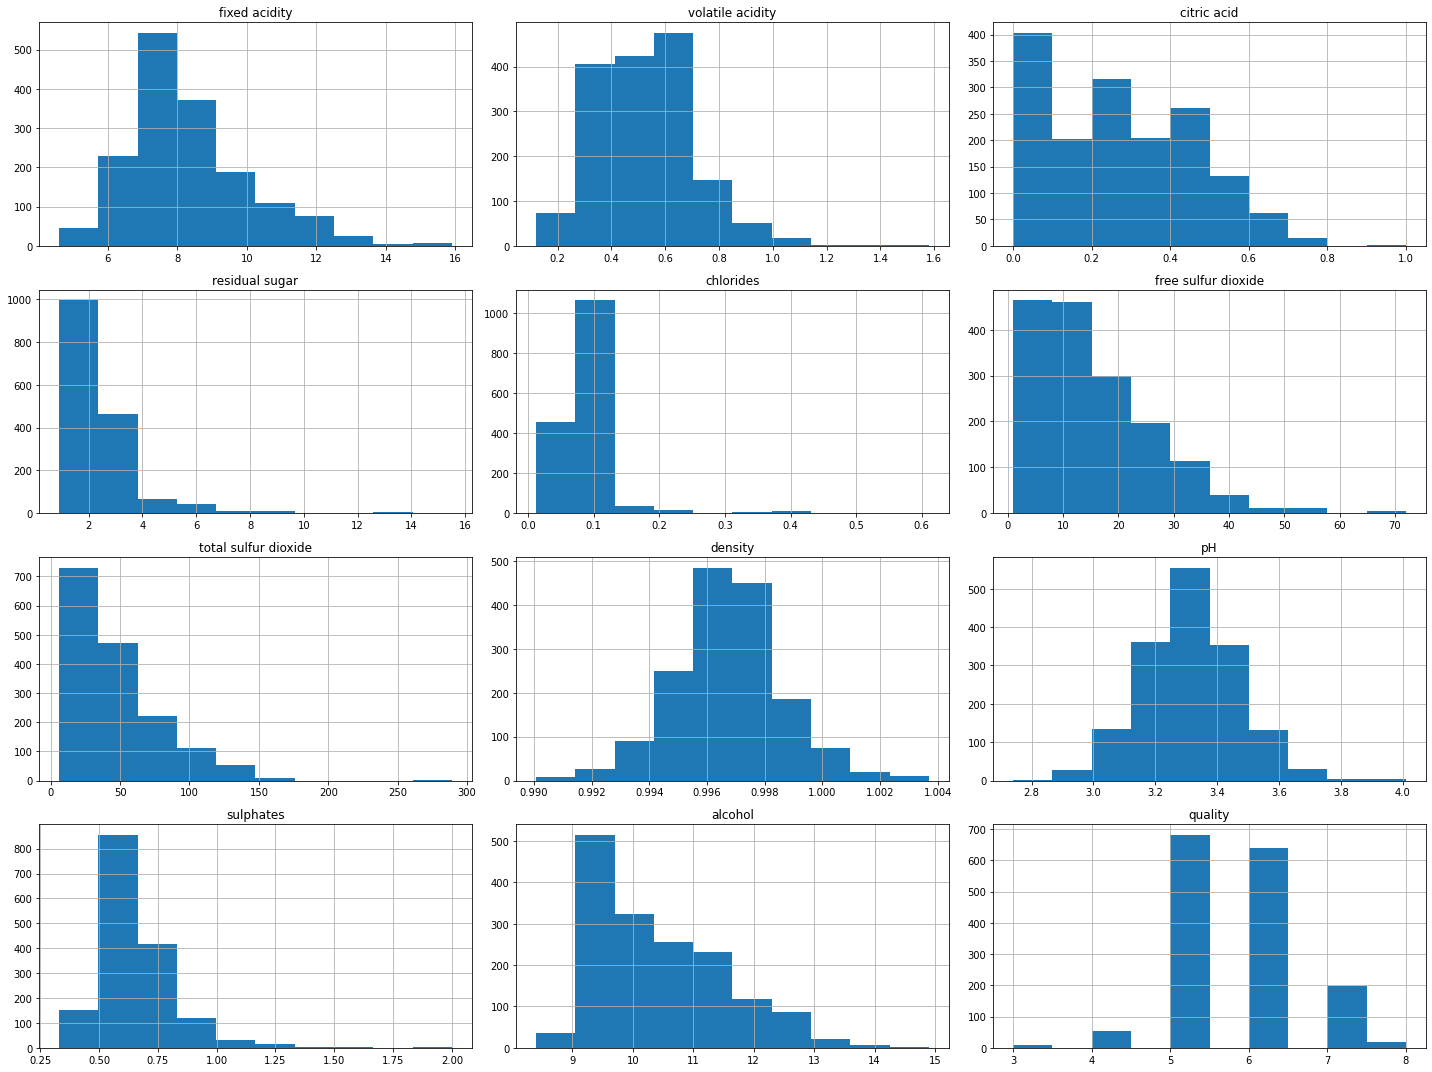

In [6]:
plt.figure()
wine.hist(figsize=(20,15))
plt.tight_layout()

Parece que el conjunto de datos no tiene valores nulos en ninguna de las características, etiquetas. Descubramos ahora las correlaciones entre las características y las etiquetas.

Aca se pueden ver las correlaciones entre las variables en forma de grafica.

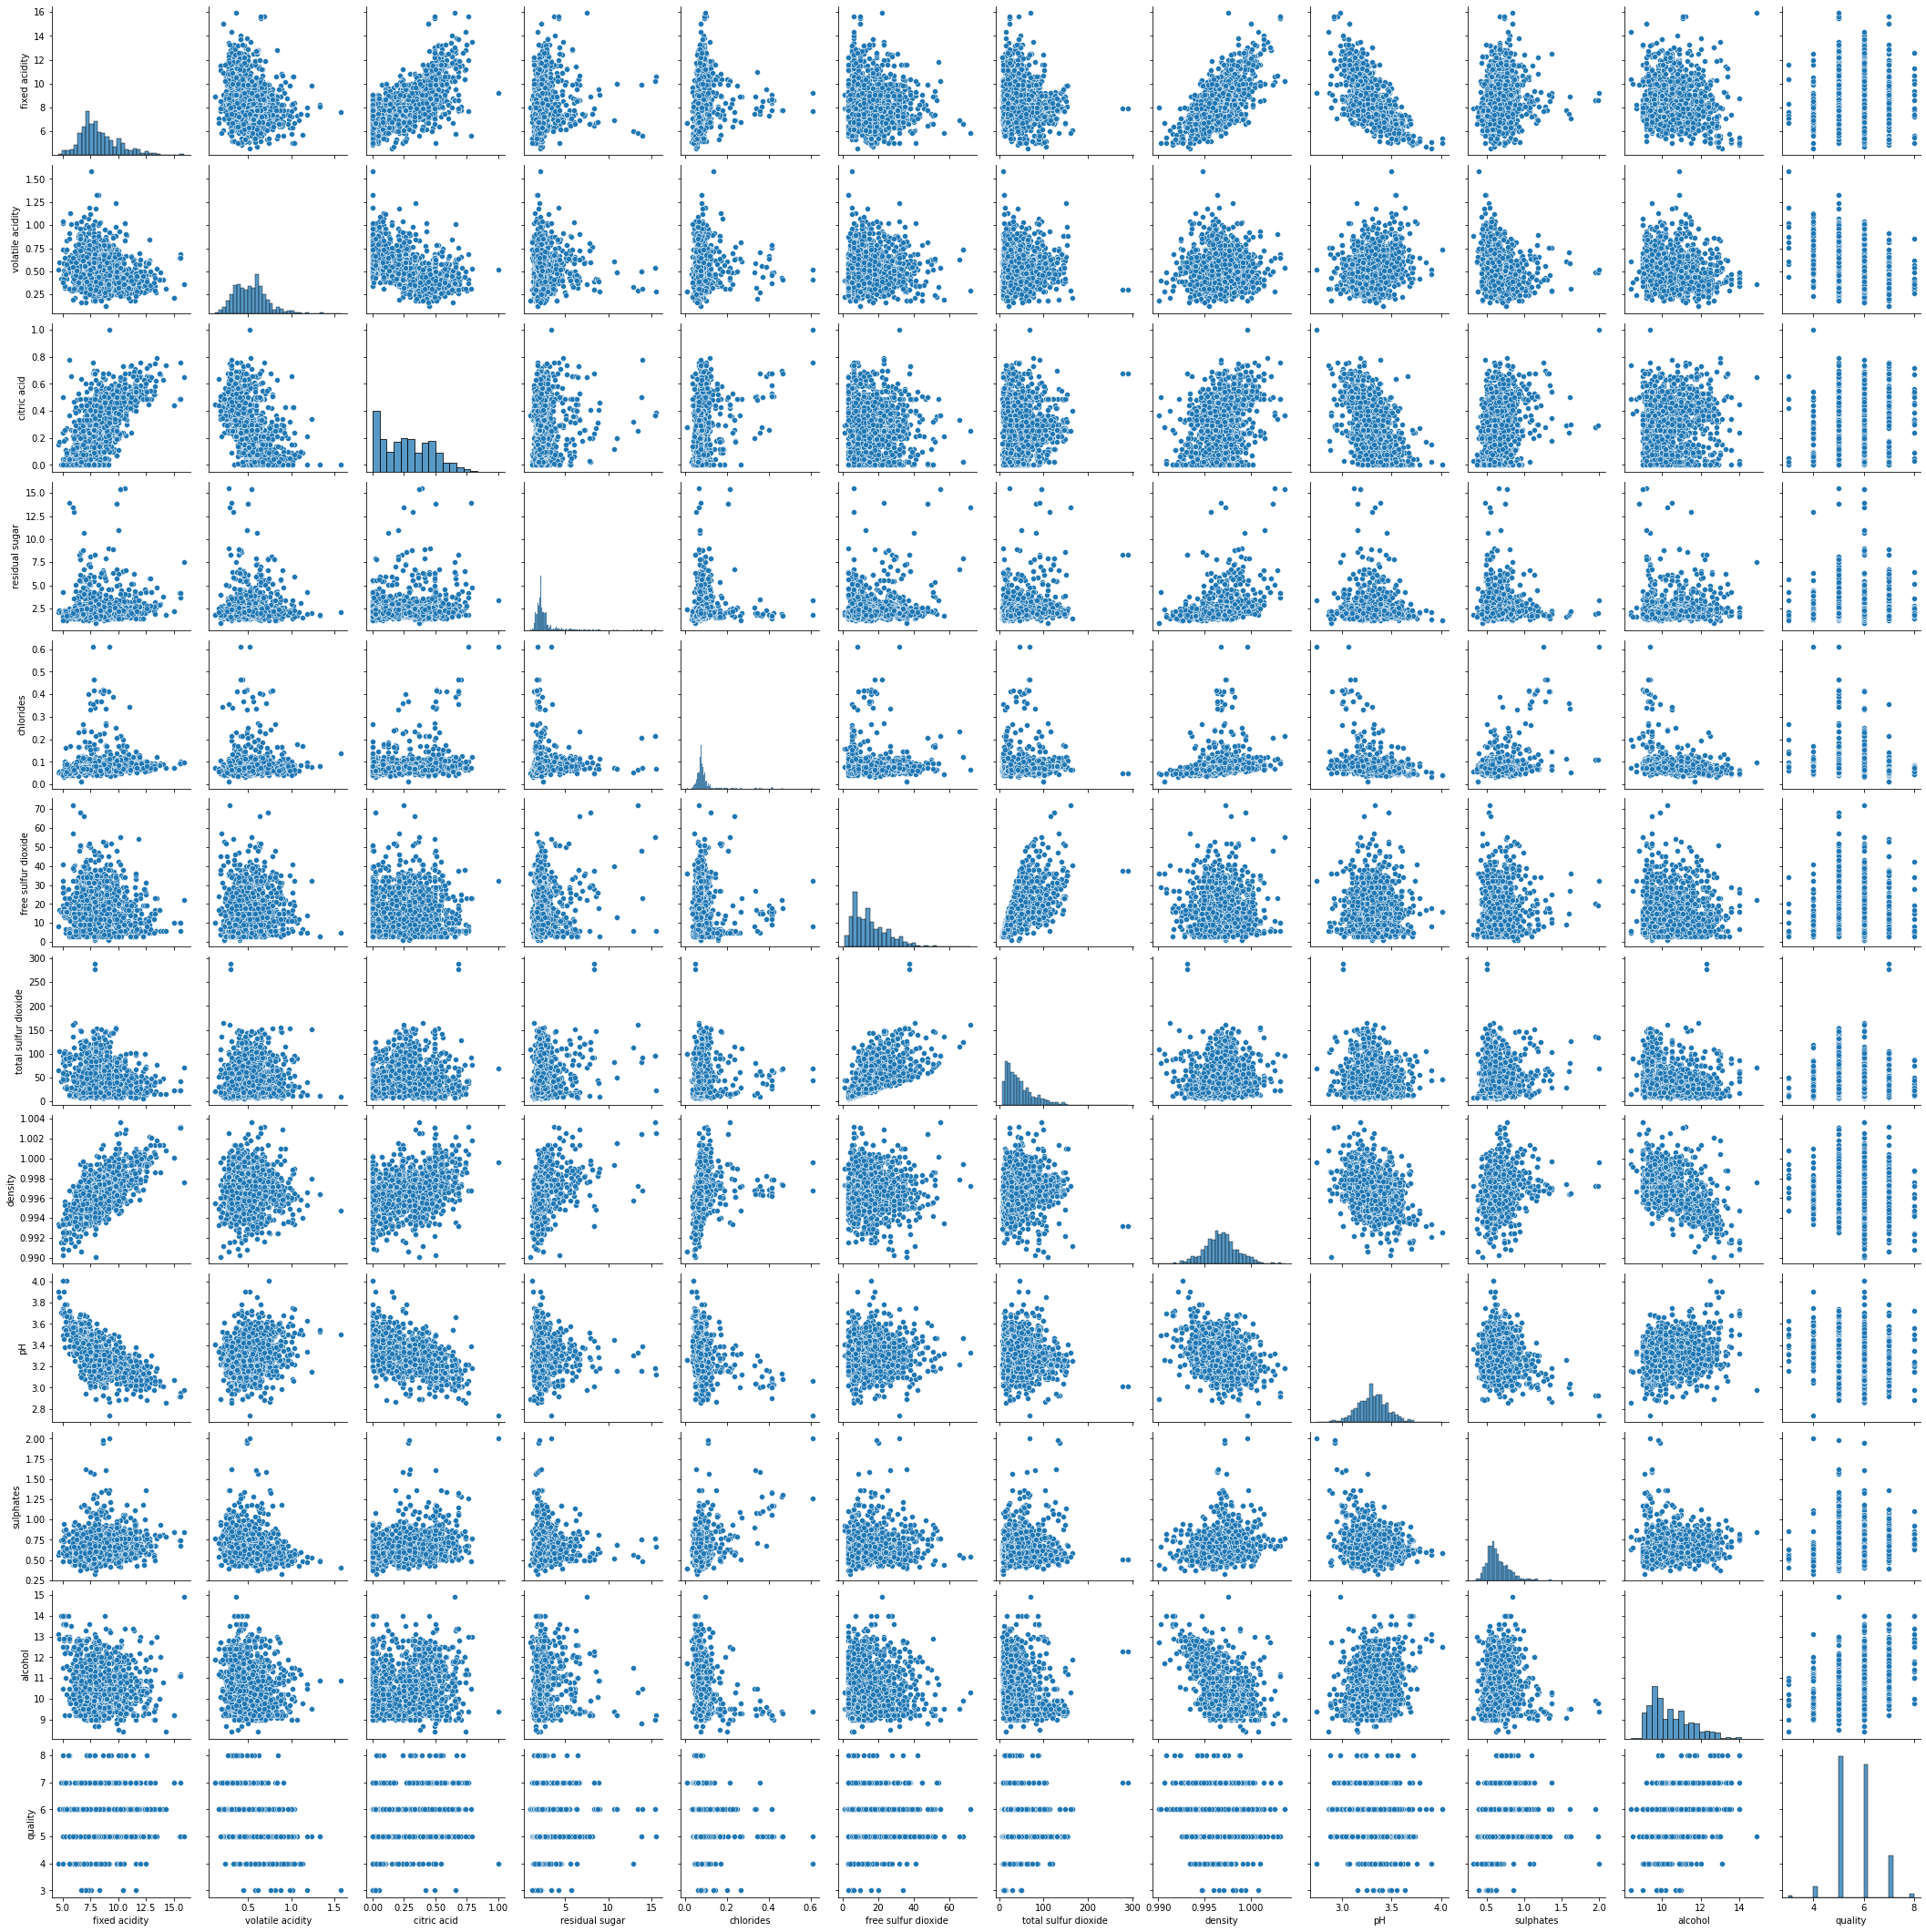

In [7]:
sns.pairplot(wine)

# Data Preprocessing

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Finding Co-relation between data features attributes


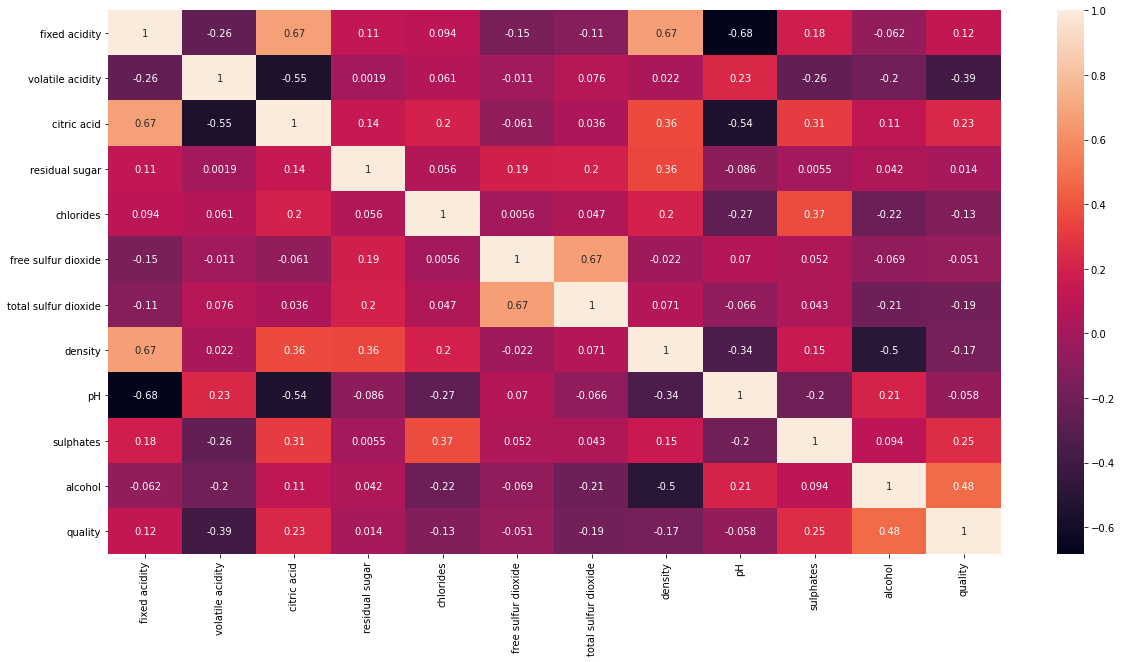

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(wine.corr(), annot = True)

PODEMOS OBSERVAR COMO HAY VARIABLES QUE DAN UN 0.67 ES DECIR UN APROX DE 0.7


- Por ejemplo las variables mas corr

Gracias al analisis de correlacion de todas las columnas del dataset puedo determinar que las variables de 'citric acid', 'fixed acidity', 'density', 'free sulfur dioxide', 'total sulfur dioxide' mostrara un comportamiento mas  ya que sus valores se aproximan a 1
y el ph da aprox -1

In [9]:
 # Previamente al análisis de Regresión Lineal, conviene analizar la Correlación
# entre dos variables.
pearson_corr = wine.corr(method='pearson').round(2)
pearson_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


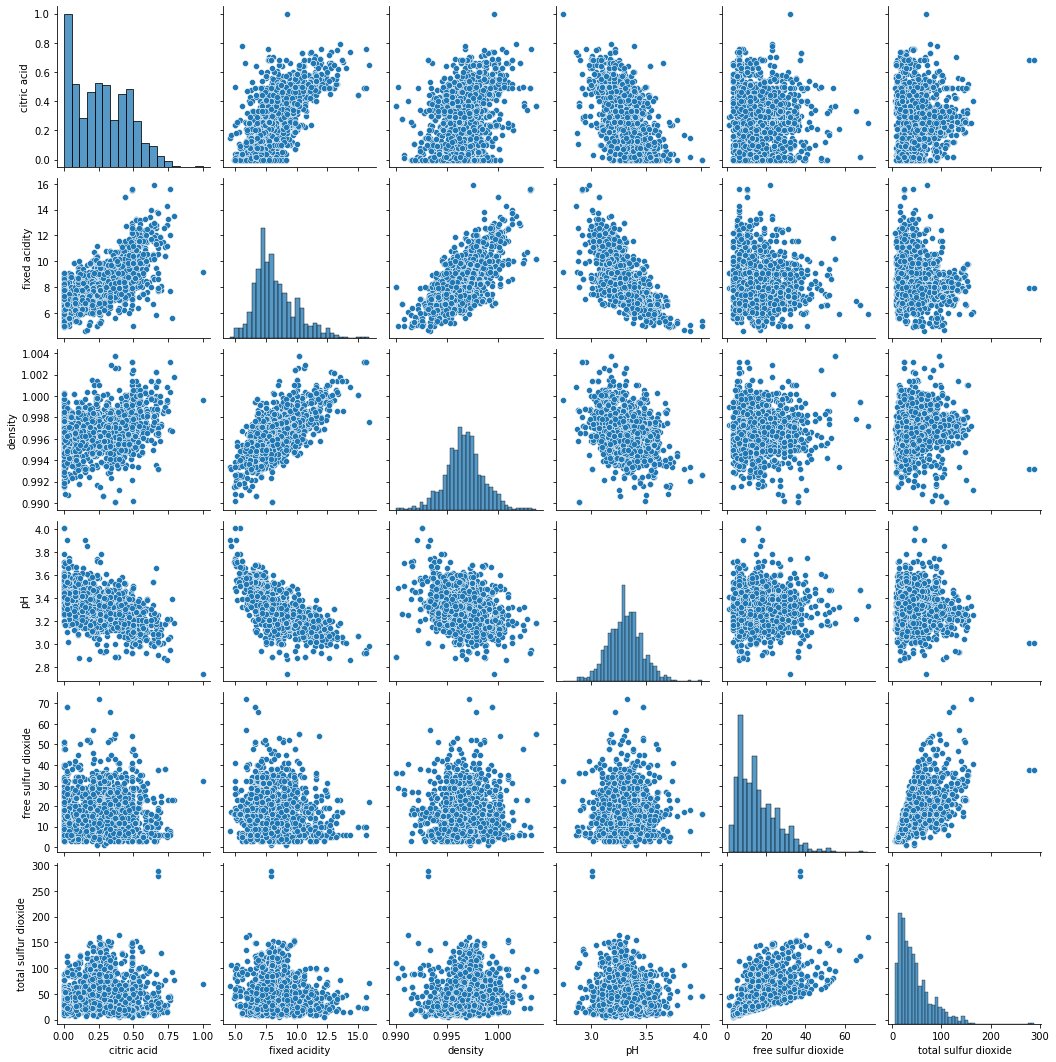

In [11]:
# Gráficos de Histograma y Dispersión
# Los Histogramas muestran la información con respecto a una misma variable.
# Los gráficos de Dispersión muestran la relación entre dos variables.
sns.pairplot(data=wine,
                  y_vars=['citric acid', 'fixed acidity', 'density', 'pH','free sulfur dioxide','total sulfur dioxide'],
                  x_vars=['citric acid', 'fixed acidity', 'density', 'pH','free sulfur dioxide','total sulfur dioxide'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma de Total  sulfur dioxide')

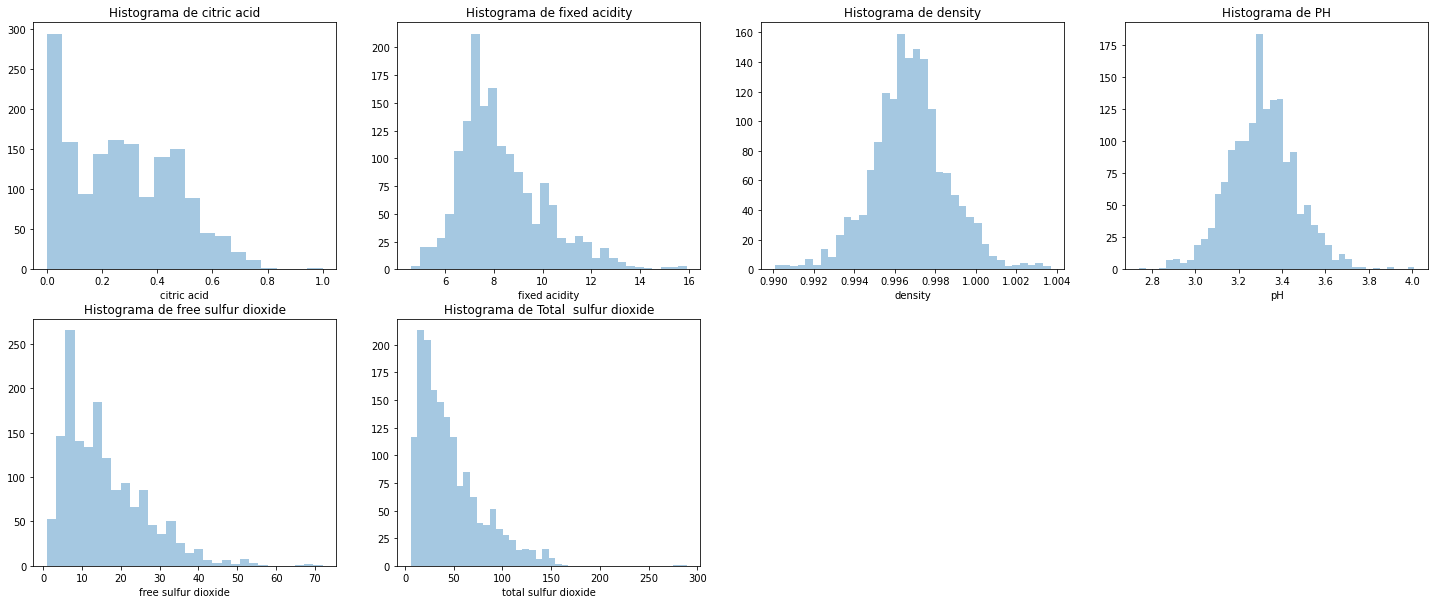

In [16]:
plt.figure(figsize=(25,10))
# ['citric acid', 'fixed acidity', 'density', 'pH']

plt.subplot(241)
sns.distplot(wine['citric acid'], kde = False).set_title("Histograma de citric acid")

plt.subplot(242)
sns.distplot(wine['fixed acidity'], kde = False).set_title("Histograma de fixed acidity")

plt.subplot(243)
sns.distplot(wine['density'], kde = False).set_title("Histograma de density")

plt.subplot(244)
sns.distplot(wine['pH'], kde = False).set_title("Histograma de PH")

plt.subplot(245)
sns.distplot(wine['free sulfur dioxide'], kde = False).set_title("Histograma de free sulfur dioxide")

plt.subplot(246)
sns.distplot(wine['total sulfur dioxide'], kde = False).set_title("Histograma de Total  sulfur dioxide")